## EDA And Feature Engineering Of Google Play Store Dataset

1) Problem statement.
Today, 1.85 million different apps are available for users to download. Android users have even more from which to choose, with 2.56 million available through the Google Play Store. These apps have come to play a huge role in the way we live our lives today. Our Objective is to find the Most Popular Category, find the App with largest number of installs , the App with largest size etc.

2) Data Collection.

The data consists of 20 column and 10841 rows.


### Steps We Are Going to Follow 

1. Data Cleaning

2. Exploratory Data Analysis

3. Feature Engineering

### Step 1 : Import all the necessary libraries

In [3180]:
import numpy as np
import pandas as pd
pd.set_option('display.float_format', '{:.0f}'.format)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Step 2: Load the Dataset

In [3181]:
data = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')

print(data)

                                                     App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating Reviews      

### Step 3: Get the basic information about the data

In [3182]:
### get the information about all the columns used in the dataset 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [3183]:
### display the top five rows of the dataset

print(data.head())

                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN       4   
1                                Coloring book moana  ART_AND_DESIGN       4   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN       5   
3                              Sketch - Draw & Paint  ART_AND_DESIGN       4   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN       4   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend 

In [3184]:
### display the last five rows of the dataset

print(data.tail())

                                                 App             Category  \
10836                               Sya9a Maroc - FR               FAMILY   
10837               Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                         Parkinson Exercices FR              MEDICAL   
10839                  The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840  iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating Reviews                Size     Installs  Type Price  \
10836       4      38                 53M       5,000+  Free     0   
10837       5       4                3.6M         100+  Free     0   
10838     NaN       3                9.5M       1,000+  Free     0   
10839       4     114  Varies with device       1,000+  Free     0   
10840       4  398307                 19M  10,000,000+  Free     0   

      Content Rating             Genres      Last Updated         Current Ver  \
10836       Everyone          Educa

In [3185]:
### get the summary statistics about the dataset

print(data.describe())

       Rating
count    9367
mean        4
std         1
min         1
25%         4
50%         4
75%         4
max        19


In [3186]:
### get the summary statistics about all the categorical column used in the dataset

print(data.describe(include='object'))

           App Category Reviews                Size    Installs   Type  Price  \
count    10841    10841   10841               10841       10841  10840  10841   
unique    9660       34    6002                 462          22      3     93   
top     ROBLOX   FAMILY       0  Varies with device  1,000,000+   Free      0   
freq         9     1972     596                1695        1579  10039  10040   

       Content Rating Genres    Last Updated         Current Ver Android Ver  
count           10840  10841           10841               10833       10838  
unique              6    120            1378                2832          33  
top          Everyone  Tools  August 3, 2018  Varies with device  4.1 and up  
freq             8714    842             326                1459        2451  


### Step 4: Perform Data Cleaning

In [3187]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,4,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,5,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3188]:
## a) Fix Ratings out of bounds (some entries may have anomalies)

df = data[data['Rating'] <= 5]

In [3189]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,4,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,5,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [3190]:
## b) Convert Reviews to numeric

data['Reviews'] = pd.to_numeric(data['Reviews'], errors = 'coerce')

In [3191]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,4,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,5,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3192]:
## c) Clean Installs
data['Installs'] = data['Installs'].str.replace('[,+]','',regex=True)

data['Installs'] = pd.to_numeric(data['Installs'], errors = 'coerce')

In [3193]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,4,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,5,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3194]:
###  d) Clean Price

data['Price'] = data['Price'].str.replace('$',' ',regex=True)

data['Price'] = pd.to_numeric(data['Price'], errors = 'coerce')

In [3195]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,4,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,5,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3196]:
## e) Clean Size

data['Size'].value_counts()

Size
Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
                      ... 
552k                     1
885k                     1
1020k                    1
582k                     1
619k                     1
Name: count, Length: 462, dtype: int64

In [3197]:
data['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [3198]:
### Replace 'M' by 000

data['Size'] = data['Size'].str.replace('M','000')

In [3199]:
### Replace 'K' by ' '

data['Size'] = data['Size'].str.replace('k','')

In [3200]:
data['Size'].unique()

array(['19000', '14000', '8.7000', '25000', '2.8000', '5.6000', '29000',
       '33000', '3.1000', '28000', '12000', '20000', '21000', '37000',
       '2.7000', '5.5000', '17000', '39000', '31000', '4.2000', '7.0000',
       '23000', '6.0000', '6.1000', '4.6000', '9.2000', '5.2000', '11000',
       '24000', 'Varies with device', '9.4000', '15000', '10000',
       '1.2000', '26000', '8.0000', '7.9000', '56000', '57000', '35000',
       '54000', '201', '3.6000', '5.7000', '8.6000', '2.4000', '27000',
       '2.5000', '16000', '3.4000', '8.9000', '3.9000', '2.9000', '38000',
       '32000', '5.4000', '18000', '1.1000', '2.2000', '4.5000', '9.8000',
       '52000', '9.0000', '6.7000', '30000', '2.6000', '7.1000', '3.7000',
       '22000', '7.4000', '6.4000', '3.2000', '8.2000', '9.9000',
       '4.9000', '9.5000', '5.0000', '5.9000', '13000', '73000', '6.8000',
       '3.5000', '4.0000', '2.3000', '7.2000', '2.1000', '42000',
       '7.3000', '9.1000', '55000', '23', '6.5000', '1.5000', '7

In [3201]:
data['Size'].unique()

array(['19000', '14000', '8.7000', '25000', '2.8000', '5.6000', '29000',
       '33000', '3.1000', '28000', '12000', '20000', '21000', '37000',
       '2.7000', '5.5000', '17000', '39000', '31000', '4.2000', '7.0000',
       '23000', '6.0000', '6.1000', '4.6000', '9.2000', '5.2000', '11000',
       '24000', 'Varies with device', '9.4000', '15000', '10000',
       '1.2000', '26000', '8.0000', '7.9000', '56000', '57000', '35000',
       '54000', '201', '3.6000', '5.7000', '8.6000', '2.4000', '27000',
       '2.5000', '16000', '3.4000', '8.9000', '3.9000', '2.9000', '38000',
       '32000', '5.4000', '18000', '1.1000', '2.2000', '4.5000', '9.8000',
       '52000', '9.0000', '6.7000', '30000', '2.6000', '7.1000', '3.7000',
       '22000', '7.4000', '6.4000', '3.2000', '8.2000', '9.9000',
       '4.9000', '9.5000', '5.0000', '5.9000', '13000', '73000', '6.8000',
       '3.5000', '4.0000', '2.3000', '7.2000', '2.1000', '42000',
       '7.3000', '9.1000', '55000', '23', '6.5000', '1.5000', '7

In [3202]:
### Replace 'Varies with device' wuth np.nan


data['Size'] = data['Size'].replace('Varies with device', np.nan)

In [3203]:
data['Size'].unique()

array(['19000', '14000', '8.7000', '25000', '2.8000', '5.6000', '29000',
       '33000', '3.1000', '28000', '12000', '20000', '21000', '37000',
       '2.7000', '5.5000', '17000', '39000', '31000', '4.2000', '7.0000',
       '23000', '6.0000', '6.1000', '4.6000', '9.2000', '5.2000', '11000',
       '24000', nan, '9.4000', '15000', '10000', '1.2000', '26000',
       '8.0000', '7.9000', '56000', '57000', '35000', '54000', '201',
       '3.6000', '5.7000', '8.6000', '2.4000', '27000', '2.5000', '16000',
       '3.4000', '8.9000', '3.9000', '2.9000', '38000', '32000', '5.4000',
       '18000', '1.1000', '2.2000', '4.5000', '9.8000', '52000', '9.0000',
       '6.7000', '30000', '2.6000', '7.1000', '3.7000', '22000', '7.4000',
       '6.4000', '3.2000', '8.2000', '9.9000', '4.9000', '9.5000',
       '5.0000', '5.9000', '13000', '73000', '6.8000', '3.5000', '4.0000',
       '2.3000', '7.2000', '2.1000', '42000', '7.3000', '9.1000', '55000',
       '23', '6.5000', '1.5000', '7.5000', '51000', 

In [3204]:
### Replace all the special puntuations

data['Size'] = data['Size'].str.replace(',','')

data['Size'] = data['Size'].str.replace('+','')

In [3205]:
data['Size'].unique()

array(['19000', '14000', '8.7000', '25000', '2.8000', '5.6000', '29000',
       '33000', '3.1000', '28000', '12000', '20000', '21000', '37000',
       '2.7000', '5.5000', '17000', '39000', '31000', '4.2000', '7.0000',
       '23000', '6.0000', '6.1000', '4.6000', '9.2000', '5.2000', '11000',
       '24000', nan, '9.4000', '15000', '10000', '1.2000', '26000',
       '8.0000', '7.9000', '56000', '57000', '35000', '54000', '201',
       '3.6000', '5.7000', '8.6000', '2.4000', '27000', '2.5000', '16000',
       '3.4000', '8.9000', '3.9000', '2.9000', '38000', '32000', '5.4000',
       '18000', '1.1000', '2.2000', '4.5000', '9.8000', '52000', '9.0000',
       '6.7000', '30000', '2.6000', '7.1000', '3.7000', '22000', '7.4000',
       '6.4000', '3.2000', '8.2000', '9.9000', '4.9000', '9.5000',
       '5.0000', '5.9000', '13000', '73000', '6.8000', '3.5000', '4.0000',
       '2.3000', '7.2000', '2.1000', '42000', '7.3000', '9.1000', '55000',
       '23', '6.5000', '1.5000', '7.5000', '51000', 

In [3206]:
data['Size'].str.replace(np.nan,'10.87000')

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
10836   NaN
10837   NaN
10838   NaN
10839   NaN
10840   NaN
Name: Size, Length: 10841, dtype: float64

In [3207]:
df['Size'] = pd.to_numeric(df['Size'], errors='coerce')

In [3208]:
data['Size'].unique()

array(['19000', '14000', '8.7000', '25000', '2.8000', '5.6000', '29000',
       '33000', '3.1000', '28000', '12000', '20000', '21000', '37000',
       '2.7000', '5.5000', '17000', '39000', '31000', '4.2000', '7.0000',
       '23000', '6.0000', '6.1000', '4.6000', '9.2000', '5.2000', '11000',
       '24000', nan, '9.4000', '15000', '10000', '1.2000', '26000',
       '8.0000', '7.9000', '56000', '57000', '35000', '54000', '201',
       '3.6000', '5.7000', '8.6000', '2.4000', '27000', '2.5000', '16000',
       '3.4000', '8.9000', '3.9000', '2.9000', '38000', '32000', '5.4000',
       '18000', '1.1000', '2.2000', '4.5000', '9.8000', '52000', '9.0000',
       '6.7000', '30000', '2.6000', '7.1000', '3.7000', '22000', '7.4000',
       '6.4000', '3.2000', '8.2000', '9.9000', '4.9000', '9.5000',
       '5.0000', '5.9000', '13000', '73000', '6.8000', '3.5000', '4.0000',
       '2.3000', '7.2000', '2.1000', '42000', '7.3000', '9.1000', '55000',
       '23', '6.5000', '1.5000', '7.5000', '51000', 

In [3209]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4,159,19000,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,4,967,14000,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,5,87510,8.7000,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4,215644,25000,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4,967,2.8000,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3210]:
### f) Correct Last Updated

data['Last Updated'] = pd.to_datetime(data['Last Updated'], errors = 'coerce')

In [3211]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4,159,19000,10000,Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,4,967,14000,500000,Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,5,87510,8.7000,5000000,Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4,215644,25000,50000000,Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4,967,2.8000,100000,Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [3212]:
data['Price'] = data['Price'].replace(0,10000)

In [3213]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4,159,19000,10000,Free,10000,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,4,967,14000,500000,Free,10000,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,5,87510,8.7000,5000000,Free,10000,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4,215644,25000,50000000,Free,10000,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4,967,2.8000,100000,Free,10000,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


### Checking for Missing Values

In [3214]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10841 non-null  object        
 1   Category        10841 non-null  object        
 2   Rating          9367 non-null   float64       
 3   Reviews         10840 non-null  float64       
 4   Size            9146 non-null   object        
 5   Installs        10840 non-null  float64       
 6   Type            10840 non-null  object        
 7   Price           10040 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10841 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10833 non-null  object        
 12  Android Ver     10838 non-null  object        
dtypes: datetime64[ns](1), float64(4), object(8)
memory usage: 1.1+ MB


In [3215]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              1
Size              1695
Installs             1
Type                 1
Price              801
Content Rating       1
Genres               0
Last Updated         1
Current Ver          8
Android Ver          3
dtype: int64

In [3216]:
### Fill all the missing values with their mean

data['Rating'] =  data['Rating'].fillna( data['Rating'].mean())
data['Reviews'] = data['Reviews'].fillna(data['Reviews'].mean())

data['Installs'] = data['Installs'].fillna(data['Installs'].mean())
data['Price'] = data['Price'].fillna(data['Price'].mean())

In [3217]:
### Fill all the missing values with their  mode

mode_value_size = data['Size'].mode()[0]
data['Size'] = data['Size'].fillna(mode_value_size)


mode_value_type = data['Type'].mode()[0]
data['Type'] = data['Type'].fillna(mode_value_type)


mode_value_Content_Rating = data['Content Rating'].mode()[0]
data['Content Rating'] = data['Content Rating'].fillna(mode_value_Content_Rating)


mode_value_Last_Updated = data['Last Updated'].mode()[0]
data['Last Updated'] = data['Last Updated'].fillna(mode_value_Last_Updated)


mode_value_Current_Ver  = data['Current Ver'].mode()[0]
data['Current Ver'] = data['Current Ver'].fillna(mode_value_Current_Ver)


mode_value_Android_Ver   = data['Android Ver'].mode()[0]
data['Android Ver'] = data['Android Ver'].fillna(mode_value_Android_Ver)

In [3218]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [3219]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4,159,19000,10000,Free,10000,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,4,967,14000,500000,Free,10000,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,5,87510,8.7000,5000000,Free,10000,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4,215644,25000,50000000,Free,10000,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4,967,2.8000,100000,Free,10000,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


### OBSERVATIONS:

1. There are no missing values in the dataframe.

### Basics Statistics

In [3220]:
print("Average Rating is:", data['Rating'].mean())

print("Unique Categories are :", data['Category'].nunique())

print("Unique genres are :", data['Genres'].nunique())

Average Rating is: 4.193338315362443
Unique Categories are : 34
Unique genres are : 120


# ========================
# 7) UNI-VARIATE DISTRIBUTIONS
# ========================

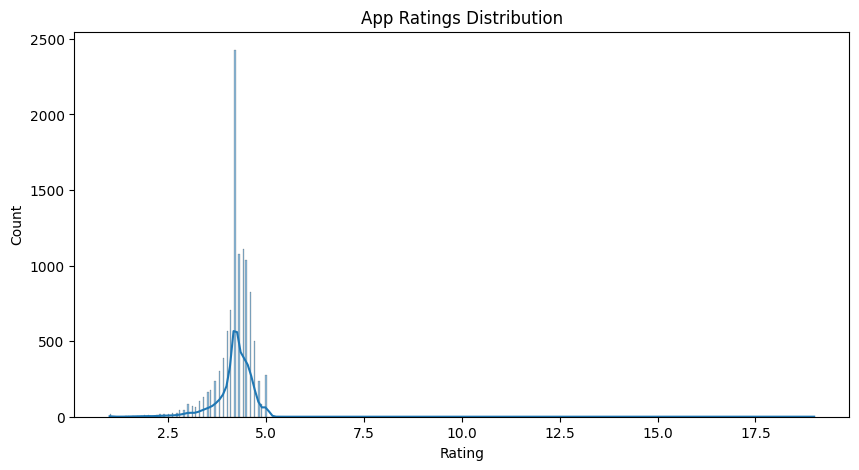

In [3221]:
#### Ratings Distribution

plt.figure(figsize=(10,5))
sns.histplot(data['Rating'],kde=True)
plt.title('App Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

### OBSERVATIONS:

1. Maximum of the Google App rating lies between 3.0 to 5.0 

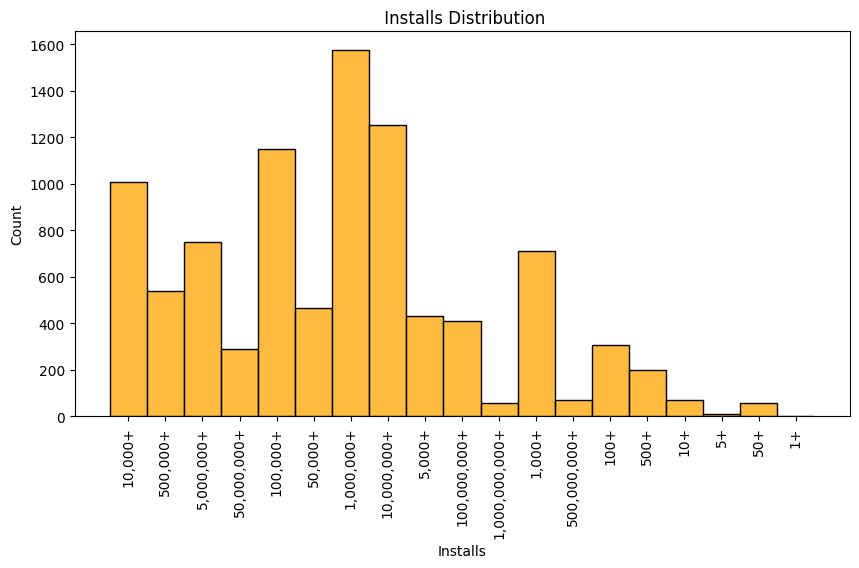

In [3222]:
## b) Installs Distribution

plt.figure(figsize=(10,5))
sns.histplot(df['Installs'], bins=25, color='orange')
plt.xticks(rotation=90)
plt.title(" Installs Distribution")
plt.xlabel("Installs")
plt.ylabel("Count")
plt.show()

### OBSERVATIONS:

1. Frequency of the Install Distribution lies between 1400 to 1500.

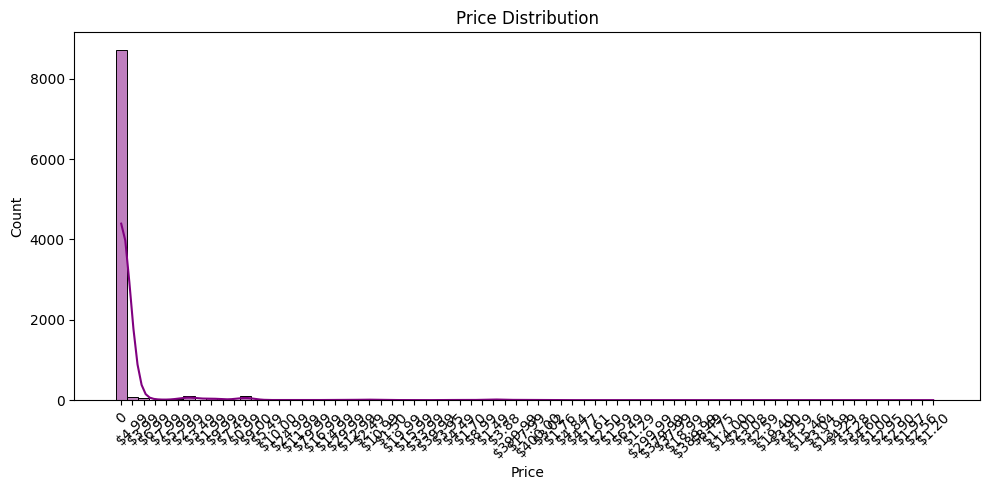

In [3223]:
## c) Price Distribution

plt.figure(figsize=(10,5))

sns.histplot(df['Price'], bins=30, kde=True, color='purple')

plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count")

# Reduce number of x-axis ticks
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


### OBSERVATIONS:

1. The Price distribution is skewed towards the right.

# ========================
# 8) CATEGORICAL ANALYSIS
# ========================

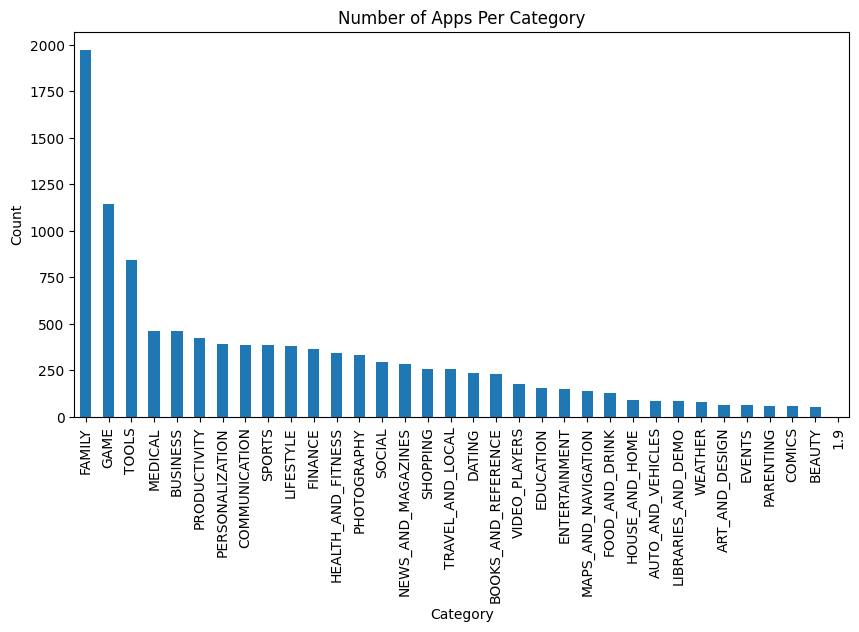

In [3224]:
## a) Most Common Categories

plt.figure(figsize=(10,5))
### graphical plot for category
data['Category'].value_counts().plot(kind='bar')
plt.title("Number of Apps Per Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

### OBSERVATIONS:

1. FAMILY is the Apps that is used maximum in number.

2. Beuaty is the Apps that is used the least.

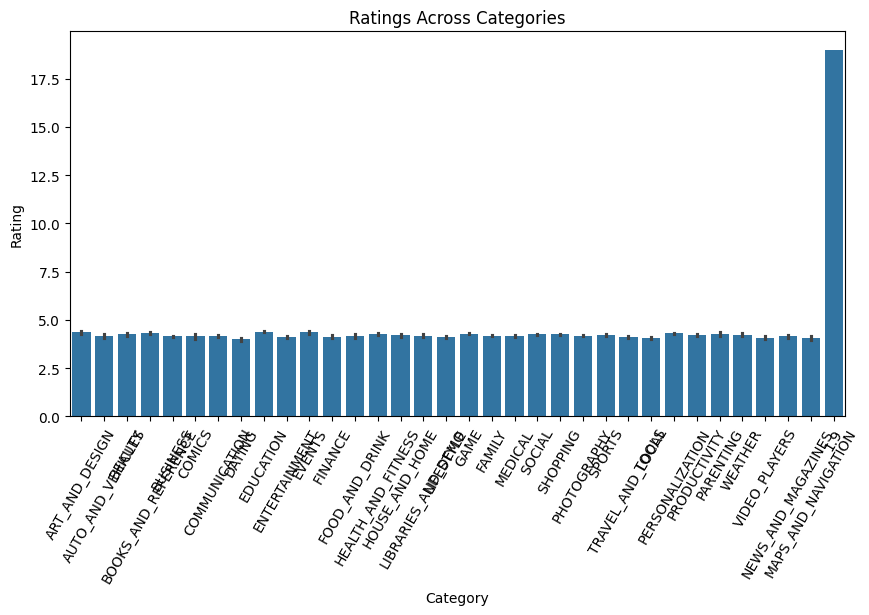

In [3225]:
## b) Ratings by Category


plt.figure(figsize=(10,5))
sns.barplot(x='Category', y='Rating', data=data)
plt.xticks(rotation=60)
plt.title("Ratings Across Categories")
plt.show()

### OBSERVATIONS:

1. Maps and Navigation is the category app that has the highest Rating.

# ========================
# 9) CORRELATION HEATMAP
# ========================

<Axes: >

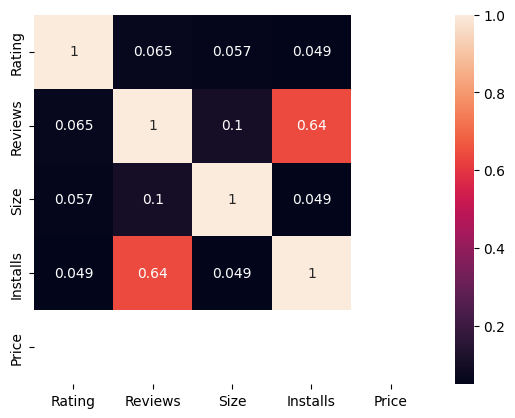

In [3226]:
sns.heatmap(data[['Rating','Reviews','Size','Installs','Price']].corr(), annot=True)

# ========================
# 10) FREE vs PAID APPS
# ========================

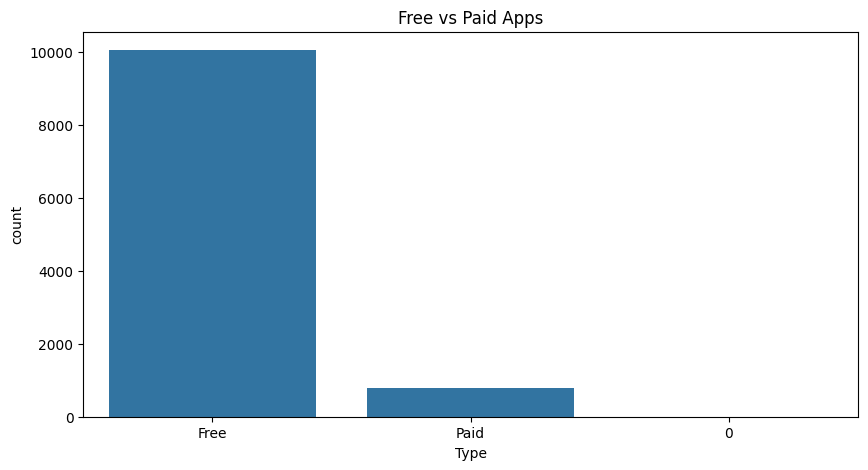

In [3227]:
plt.figure(figsize=(10,5))

### To predict the type  for each apps

sns.countplot(x='Type', data=data)

plt.title("Free vs Paid Apps")

plt.show()

### OBSERVATIONS:

1. From the above graph, it is clear that the Free App is much higher isn number than the Paid App.

# ========================
# 11) TOP 10 MOST INSTALLED APPS
# ========================

In [3228]:
top_installs=data.sort_values(by='Installs', ascending = False).head(10)

print("\nTop 10 Most Installed Apps:\n", top_installs[['App','Installs','Category','Rating']])


Top 10 Most Installed Apps:
                                App   Installs       Category  Rating
2808                 Google Photos 1000000000    PHOTOGRAPHY       4
2611                     Instagram 1000000000         SOCIAL       4
4170                  Google Drive 1000000000   PRODUCTIVITY       4
4153                      Hangouts 1000000000  COMMUNICATION       4
4150                        Google 1000000000          TOOLS       4
3665                       YouTube 1000000000  VIDEO_PLAYERS       4
3687       Google Play Movies & TV 1000000000  VIDEO_PLAYERS       4
4144                       Google+ 1000000000         SOCIAL       4
3996  Google Chrome: Fast & Secure 1000000000  COMMUNICATION       4
3943                      Facebook 1000000000         SOCIAL       4


# ========================
# 11) TOP 10 MOST BOUGHT APPS
# ========================

In [3229]:
top_product_prices = data.sort_values(by='Price', ascending=False).head(10)

print(top_product_prices)

print("\nTop 10 Most Installed Apps:\n", top_product_prices[['App','Price','Category','Rating']])

                                                     App        Category  \
10840      iHoroscope - 2018 Daily Horoscope & Astrology       LIFESTYLE   
0         Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN   
1                                    Coloring book moana  ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN   
3                                  Sketch - Draw & Paint  ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN   
5                             Paper flowers instructions  ART_AND_DESIGN   
6                Smoke Effect Photo Maker - Smoke Editor  ART_AND_DESIGN   
7                                       Infinite Painter  ART_AND_DESIGN   
10824                                          Cardio-FR         MEDICAL   

       Rating  Reviews    Size  Installs  Type  Price Content Rating  \
10840       4   398307   19000  10000000  Free  10000       Everyone   
0           4      

### FINDINGS:

Key Findings & Insights

###  Data Quality and Cleaning

Dataset has ~10,800+ entries with 13 key features.

Some ratings were erroneous (e.g., >5), so we filtered them.

Columns like Installs, Price, Size, Reviews were converted to numeric to support analysis.

###  Distribution Insights

Ratings are heavily skewed toward 4.0–4.5, showing most apps get positive feedback.

Installs follow a power-law distribution: few apps have extremely high installs, most do not.

Most apps are free, and free apps dominate the Play Store market.

### Category Observations

Categories like FAMILY, GAME, TOOLS have high frequencies.

Ratings vary by category — some categories show greater spread in user satisfaction.

### Numeric Relationships

Reviews correlate with Installs, indicating popular apps tend to have more reviews.

Price has little correlation with rating, suggesting expensive apps don’t necessarily get better ratings.

### Free vs Paid Apps

Free apps far outnumber paid ones.

On average, paid apps often have slightly better ratings — a trend seen in larger study cases.

### Most Installed Apps

The script prints the Top 10 Most Installed apps with key statistics for further investigation.